In [1]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

# Import pandas 
import pandas as pd

In [3]:
keras.backend.backend()

'tensorflow'

In [0]:
# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [5]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df = pd.read_csv(URL, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
#Data exploration
# Print info on white wine
print(white.info())

# Print info on red wine
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null fl

In [7]:
# First rows of `red` 
red.head()

# Last rows of `white`
white.tail()

# Take a sample of 5 rows of `red`
red.sample(5)

# Describe `white`
white.describe()

# Double check for null values in `red`
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


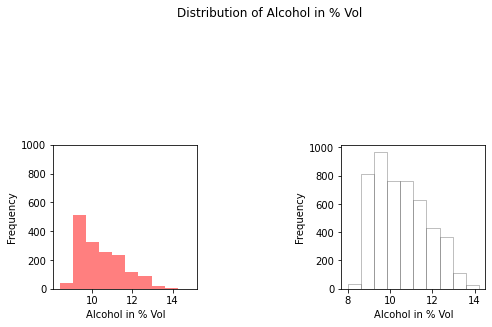

In [8]:
#Visualization
#Alcohol
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

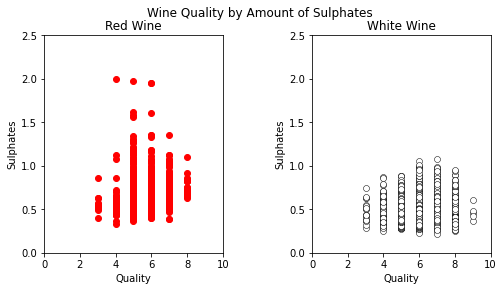

In [9]:
# Sulphates %

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

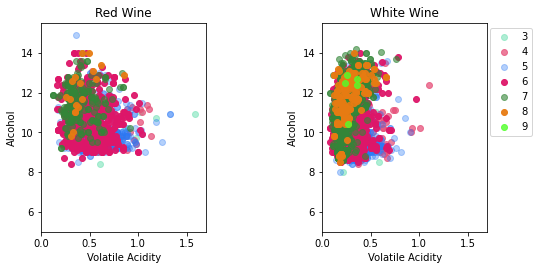

In [10]:
#Acidity
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

Preprocess Data


In [0]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

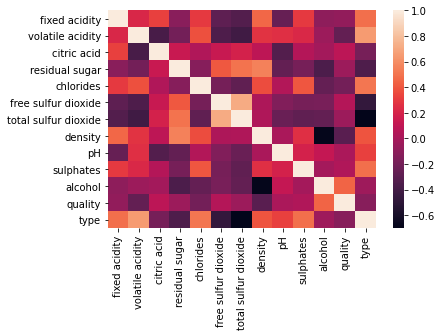

In [12]:
#Corelation Matrix
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#sns.plt.show()

In [0]:
# TRain and Test Sets
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array
y= np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
#Standardize Data
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

Model Data

In [0]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
#model.add(Dense(12, activation='tahn', input_shape=(11,)))
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [41]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[-3.22897553e-01,  7.86239505e-02,  3.73678327e-01,
          4.08948600e-01,  7.69711733e-02,  2.97683895e-01,
         -2.32234567e-01, -4.65524912e-01, -8.69006515e-02,
         -3.98980230e-01,  1.87828600e-01,  8.19736123e-02],
        [-5.08453131e-01,  4.26146388e-02, -2.87558943e-01,
          3.89657021e-02,  1.64985418e-01, -1.23057455e-01,
          3.78349185e-01,  1.32446170e-01, -4.14486587e-01,
         -1.69171095e-02,  1.28653288e-01, -2.98877776e-01],
        [ 2.27189898e-01, -7.38308728e-02, -2.84951925e-03,
         -1.82253480e-01,  1.68333113e-01,  3.62062395e-01,
         -2.44234473e-01, -1.39603019e-01, -3.22677195e-02,
         -2.64164239e-01, -4.34354752e-01, -3.54972124e-01],
        [-8.06844234e-03,  8.11768174e-02,  1.28871202e-02,
          2.45712936e-01, -1.14963055e-01,  3.55727017e-01,
         -3.90772343e-01, -1.82969034e-01,  6.21670485e-02,
          3.95461857e-01, -4.48785126e-01, -2.67332166e-01],
        [-3.22509944e-01,  1.3272100

Compile and Fit

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.1053 - acc: 0.9628
Epoch 2/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0274 - acc: 0.9947
Epoch 3/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0238 - acc: 0.9954
Epoch 4/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0205 - acc: 0.9959
Epoch 5/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0190 - acc: 0.9963
Epoch 6/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0171 - acc: 0.9963
Epoch 7/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0157 - acc: 0.9970
Epoch 8/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0157 - acc: 0.9966
Epoch 9/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0138 - acc: 0.9972
Epoch 10/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0135 - acc: 0.9975
Epoch 11/20
4352/4352 [======

Predict Values

In [0]:
y_pred = model.predict_classes(X_test)


In [33]:
y_pred[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

In [34]:
y_test[:5]

array([0, 1, 0, 0, 0])

Evaluate Model

In [35]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 42us/step
[0.024568286302869287, 0.9948717948717949]


In [36]:
#Confusion Matrix
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

y_true = y_test
def report_evaluation_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, labels=[0, 1], pos_label=1)
    recall = recall_score(y_true, y_pred, labels=[0, 1], pos_label=1)
    f1 = f1_score(y_true, y_pred, labels=[0, 1], pos_label=1)

    print('Precision: {0:0.4f}'.format(precision))
    print('Recall: {0:0.4f}'.format(recall))
    print('F1: {0:0.4f}'.format(f1))

    print('Cohan.s: {0:0.4f}'.format(cohen_kappa_score(y_test, y_pred)))

report_evaluation_metrics(y_true, y_pred)
print("----------")


# Confusion matrix
confusion_matrix(y_test, y_pred)

Precision: 0.9964
Recall: 0.9838
F1: 0.9901
Cohan.s: 0.9866
----------


array([[1586,    2],
       [   9,  548]])

K Fold Validation
  

In [48]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

seed = 7
np.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X, y):
    # Initialize the constructor
    model = Sequential()
    # Add an input layer 
    #model.add(Dense(12, activation='tahn', input_shape=(11,)))
    model.add(Dense(12, activation='relu', input_shape=(11,)))
    # Add one hidden layer 
    model.add(Dense(8, activation='relu'))
    # Add an output layer 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])          
    model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)


Epoch 1/20
1555/4352 [=========>....................] - ETA: 4s - loss: 0.1674 - acc: 0.9563

KeyboardInterrupt: ignored

**HyperParameter Tuning with Hypers**

In [66]:
!pip install hyperas
!pip install hyperopt

In [0]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.datasets import mnist

import np_utils

In [0]:

def data():
    '''
    Data providing function:
    '''
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split

    # Read in white wine data 
    white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

    # Read in red wine data 
    red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
    # Add `type` column to `red` with value 1
    red['type'] = 1

    # Add `type` column to `white` with value 0
    white['type'] = 0

    # Append `white` to `red`
    wines = red.append(white, ignore_index=True)

    # Specify the data 
    X=wines.iloc[:,0:11]
    # Specify the target labels and flatten the array
    y= np.ravel(wines.type)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    nb_classes = 10
    Y_train = np_utils.to_categorical(Y_train, nb_classes)
    Y_test = np_utils.to_categorical(Y_test, nb_classes)
    return X_train, Y_train, X_test, Y_test



In [0]:
def model(X_train, Y_train, X_test, Y_test):
    '''
    Model providing function:
    '''
    model = Sequential()

    model.add(Dense(512, input_shape=(11,)))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([256, 512, 1024])}}))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))

    # If we choose 'four', add an additional fourth layer
    if {{choice(['three', 'four'])}} == 'four':
        model.add(Dense(100))
        model.add({{choice([Dropout(0.5), Activation('linear')])}})
        model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='binary_crossentropy',
                  optimizer={{choice(['rmsprop', 'adam', 'sgd'])}},
                  metrics=['accuracy'])

    model.fit(X_train, Y_train,
              batch_size={{choice([64, 128])}},
              epochs=1,
              verbose=2,
              validation_data=(X_test, Y_test))
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

To run Hyperas on Google Colab we have to load the file from Drive..

In [0]:
# Install the PyDrive wrapper & import libraries.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Copy/download the file
fid = drive.ListFile({'q':"title='keras-wine.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('keras-wine.ipynb')

In [137]:
best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          max_evals=10,
                                          algo=tpe.suggest,
                                          notebook_name='keras-wine', # This is important!
                                          trials=Trials())

>>> Imports:
#coding=utf-8

from __future__ import print_function

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation
except:
    pass

try:
    from keras.datasets import mnist
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from pydrive.auth import GoogleAuth
except:
    pass

try:
    from pydrive.drive import GoogleDrive
except:
    pass

try:
    from google.colab import auth
except:
    pass

try:
    from oauth2client.client import GoogleCredentials
except:
    pass

>>> Hyperas search space:

def get_space():
    return {
        'Dropout': hp.uniform('Dropout', 0, 1),
        'Dense': hp.choice('Dense', [256, 512, 1024]),
        'Activation': hp.choice('Activation

In [129]:
#Lets see
best_run

{'Activation': 1,
 'Dense': 2,
 'Dropout': 0.4143619965361732,
 'Dropout_1': 0.09225974322037533,
 'Dropout_2': 1,
 'add': 1,
 'batch_size': 0,
 'optimizer': 1}

In [130]:
best_model